<a href="https://colab.research.google.com/gist/vaibhavshenavi/b432b09c83092c11955be07e637bf6f6/happy_monk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset= pd.read_csv('/content/breastCancer.csv')
dataset.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# devide the dataset into independent aand dependent features
X=dataset.iloc[:,1:10]
y=dataset.iloc[:,10]

In [ ]:
X.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [ ]:
# Feature Engineering
i =pd.get_dummies(X['epithelial_size'],drop_first=True)
l=pd.get_dummies(X['marginal_adhesion'],drop_first=True)

In [ ]:
# Concatinate variables with dataframe
X=X.drop(['epithelial_size','marginal_adhesion'],axis=1)

In [ ]:
X.head()

,clump_thickness,size_uniformity,shape_uniformity,bland_chromatin,mitoses
0,5,1,1,3,1
1,5,4,4,3,1
2,3,1,1,3,1
3,6,8,8,3,1
4,4,1,1,3,1


In [ ]:
X=pd.concat([X,i,l],axis=1)

In [ ]:
# spliting dataset in to training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(559, 41)

In [ ]:
y_train.shape

(559,)

In [ ]:
!pip install tensorflow
!pip3 install tensorflow

from tensorflow import keras

In [ ]:
import numpy
import keras.models

In [ ]:
# creat The ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
##lets initialize the ANN
classifier=Sequential()

In [ ]:
# adding the input layer
classifier.add(Dense(units=25,activation='relu'))

In [ ]:
# adding first hidden layer
classifier.add(Dense(units=15,activation='relu'))

In [ ]:
# adding second hidden layer
classifier.add(Dense(units=14,activation='relu'))

In [ ]:
# adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
!pip install tensor

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=80)

Epoch 1/80
38/38 [==============================] - 11s 17ms/step - loss: -154.7847 - accuracy: 0.0000e+00 - val_loss: -899.0988 - val_accuracy: 0.0000e+00
Epoch 2/80
38/38 [==============================] - 0s 10ms/step - loss: -12237.5938 - accuracy: 0.0000e+00 - val_loss: -38516.8984 - val_accuracy: 0.0000e+00
Epoch 3/80
38/38 [==============================] - 0s 6ms/step - loss: -165954.7656 - accuracy: 0.0000e+00 - val_loss: -367180.6562 - val_accuracy: 0.0000e+00
Epoch 4/80
38/38 [==============================] - 0s 5ms/step - loss: -947169.4375 - accuracy: 0.0000e+00 - val_loss: -1694236.8750 - val_accuracy: 0.0000e+00
Epoch 5/80
38/38 [==============================] - 0s 5ms/step - loss: -3459782.5000 - accuracy: 0.0000e+00 - val_loss: -5371884.5000 - val_accuracy: 0.0000e+00
Epoch 6/80
38/38 [==============================] - 0s 5ms/step - loss: -9517457.0000 - accuracy: 0.0000e+00 - val_loss: -13233567.0000 - val_accuracy: 0.0000e+00
Epoch 7/80
38/38 [=====================

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

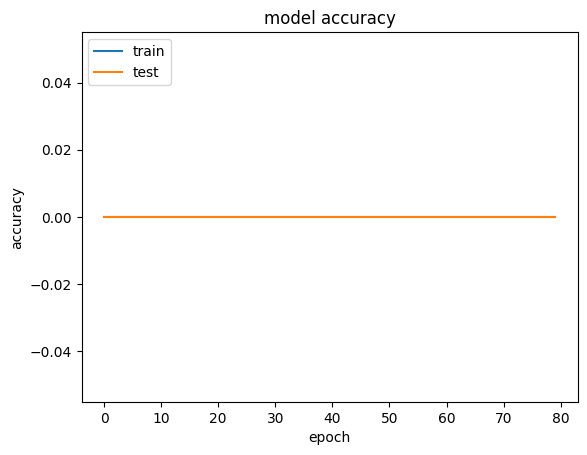

In [ ]:

#  "Accuracy"
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


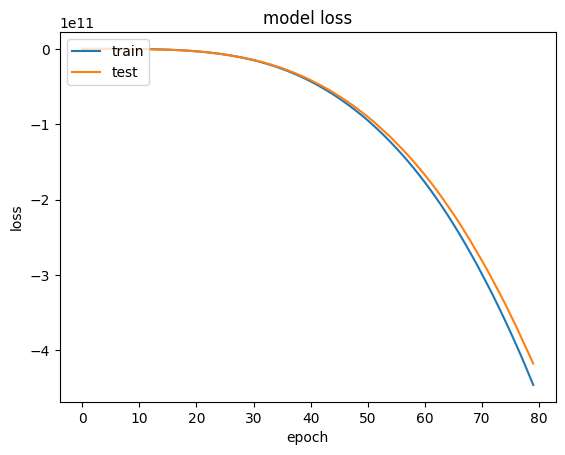

In [ ]:
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Making prediction and evaluation model

# prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 1)

5/5 [==============================] - 0s 4ms/step


In [ ]:
# confusiom Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  0],
       [85,  0,  0],
       [55,  0,  0]])

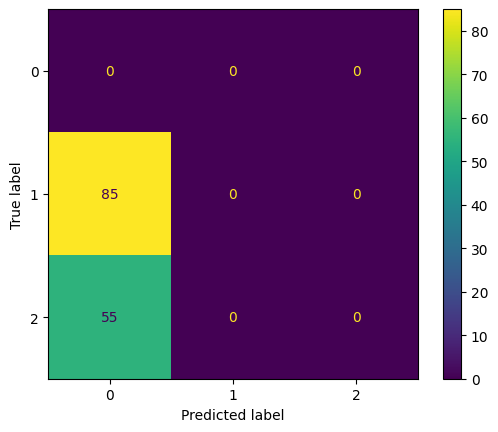

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Cal accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.0

In [ ]:
# get weights

classifier.get_weights()